## Finding the Nearest Neighbours on images 

### In this case, using the image category of  'clothes hanging on streets'

#### The images are scraped from Google, which were further used for labelling the dataset for Object Detection.

In [1]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

2023-05-08 15:45:27.890987: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

In [4]:
import networkx as nx
from sklearn.neighbors import NearestNeighbors

In [5]:
from IPython.display import Image as iImage
from IPython.display import display

In [6]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [7]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [8]:
def processImage(imagePath, model):
    im = load_image(imagePath)
    f = model.predict(im)[0]
    return f

In [9]:
images = os.listdir('./clothes_hanging_on_istanbul_streets')

In [10]:
images

['06fc889842.jpg',
 '7d9b1b8a7b.jpg',
 'fdf50ffa63.jpg',
 '69fe8f2fda.jpg',
 '4d14e9bf85.jpg',
 '193133f395.jpg',
 '2feb4262d9.jpg',
 'fe1888ff11.jpg',
 '1e9ef7c392.jpg',
 '2ddc707909.jpg',
 '734c939c88.jpg',
 '673c00ef39.jpg',
 '334da01fdc.jpg',
 '73b436a8ef.jpg',
 '801e0ebbfc.jpg',
 'ebdf5c6ef2.jpg',
 '13107d77f3.jpg',
 '9818ecddfa.jpg',
 '4394b96e91.jpg',
 '78932aa377.jpg',
 'bd482cd5d6.jpg',
 '60cd27535d.jpg',
 'e4ceae49a9.jpg',
 'c5b135fe73.jpg',
 '.DS_Store',
 'b925a294c5.jpg',
 '8f4489db3f.jpg',
 '129a35432c.jpg',
 '4584537802.jpg',
 '589828210a.jpg',
 '5964ba8c45.jpg',
 '2a5c9a70df.jpg',
 'aae130a358.jpg',
 'db7be0ef37.jpg',
 '7fa0237cc0.jpg',
 '97d5cdf1c7.jpg',
 'deeaef79f9.jpg',
 '34b7d8d16e.jpg',
 '344e4b4cbe.jpg',
 'c73e8fefc5.jpg',
 '59f8aff426.jpg',
 'd0a6b92674.jpg',
 'ed5af9d0bc.jpg',
 '24f29dc793.jpg',
 'd7054295ab.jpg',
 '4770a80857.jpg',
 '87b444f1cb.jpg',
 '78f9062f3c.jpg',
 '721c13112a.jpg',
 '39dec295e8.jpg',
 'f5f6b7919f.jpg',
 '44c26f423e.jpg',
 '42625455a3.jpg'

In [11]:
len(images)

141

In [12]:
images.sort(key = lambda x : (x.split('.')[0]))

In [13]:
images = list(filter(lambda x: x != ".DS_Store", images))

In [14]:
images

['06fc889842.jpg',
 '0a55789b8c.jpg',
 '0bb033c5c6.jpg',
 '1105be2782.jpg',
 '1134ec7ea8.jpg',
 '129a35432c.jpg',
 '13107d77f3.jpg',
 '14eaf82fe4.jpg',
 '165ca5f384.jpg',
 '191ba9eb91.jpg',
 '193133f395.jpg',
 '1e9ef7c392.jpg',
 '1eb4d16d0b.jpg',
 '2035723e0a.jpg',
 '22b51953f8.jpg',
 '24f29dc793.jpg',
 '26dfd5e5c8.jpg',
 '2a5c9a70df.jpg',
 '2d9a8bb163.jpg',
 '2ddc707909.jpg',
 '2feb4262d9.jpg',
 '301851ab17.jpg',
 '3044e75590.jpg',
 '33015e29e9.jpg',
 '334da01fdc.jpg',
 '338cd4c6f0.jpg',
 '344e4b4cbe.jpg',
 '34b7d8d16e.jpg',
 '39dec295e8.jpg',
 '3efae981ab.jpg',
 '3f9580c351.jpg',
 '42625455a3.jpg',
 '4394b96e91.jpg',
 '44c26f423e.jpg',
 '456bb56095.jpg',
 '4584537802.jpg',
 '4770a80857.jpg',
 '4d14e9bf85.jpg',
 '56a7dca7f3.jpg',
 '589828210a.jpg',
 '5964ba8c45.jpg',
 '59d64e755b.jpg',
 '59f8aff426.jpg',
 '5d1f21eba4.jpg',
 '5f79b55f74.jpg',
 '5f81a8dd49.jpg',
 '5fe6f76da1.jpg',
 '60cd27535d.jpg',
 '6373e7a0d7.jpg',
 '63a17aa941.jpg',
 '673c00ef39.jpg',
 '67b63b85c3.jpg',
 '67fa55bf67

In [15]:
features = []
for i in images:
    path = os.path.join('./clothes_hanging_on_istanbul_streets', i)
    f = processImage(path, model)
    features.append(f)

1/1 [==============================] - 0s 42ms/step


In [16]:
features

[array([0.        , 0.96199757, 0.48897883, ..., 0.04637963, 4.585704  ,
        0.20925386], dtype=float32),
 array([0.80872285, 1.1073086 , 1.4605111 , ..., 0.65400153, 0.9206638 ,
        0.12609585], dtype=float32),
 array([1.0138345 , 0.11620402, 0.00306693, ..., 1.3220774 , 0.2941685 ,
        0.0366882 ], dtype=float32),
 array([1.1170837 , 0.42554832, 0.14954583, ..., 0.0522796 , 1.7816268 ,
        0.4913602 ], dtype=float32),
 array([0.25765625, 0.45018014, 0.01238948, ..., 0.13804522, 0.698332  ,
        0.02138427], dtype=float32),
 array([0.25859728, 1.0473294 , 0.        , ..., 0.65927076, 0.16936506,
        0.14007296], dtype=float32),
 array([0.19028962, 1.3867416 , 0.        , ..., 0.00786904, 0.57862276,
        0.04010705], dtype=float32),
 array([0.1466463 , 2.8896837 , 0.        , ..., 0.02908143, 0.18941957,
        0.10336327], dtype=float32),
 array([0.75437474, 0.00401345, 0.31457952, ..., 0.08703502, 1.051882  ,
        0.30410984], dtype=float32),
 array([0.

In [17]:
nbrs = NearestNeighbors(n_neighbors = 3, algorithm='auto').fit(features)
distances, indices = nbrs.kneighbors(features)

In [18]:
indices

array([[  0,  11,  52],
       [  1,  61,  28],
       [  2, 126,  73],
       [  3,  91,  57],
       [  4,  27, 124],
       [  5, 122, 120],
       [  6, 138, 112],
       [  7,  28, 139],
       [  8,  68,  35],
       [  9,  73,  50],
       [ 10,  24,  60],
       [ 11,   0,  52],
       [ 12,  48, 130],
       [ 13,  30,  73],
       [ 14,  37,  99],
       [ 15, 128,  60],
       [ 16,  34,  65],
       [ 17,  97,  18],
       [ 18,  38,   2],
       [ 19, 124, 128],
       [ 20,  90, 120],
       [ 21,  38,  22],
       [ 22,  52,  28],
       [ 23,  58, 131],
       [ 24, 135,  19],
       [ 25, 112, 126],
       [ 26,  86,  38],
       [ 27, 133,  71],
       [ 28,   7, 126],
       [ 29,  50, 135],
       [ 30,  13,  19],
       [ 31, 125,  19],
       [ 32, 129, 131],
       [ 33,  51,  45],
       [ 34,  57,   9],
       [ 35,  13,   9],
       [ 36, 110, 119],
       [ 37,  14, 138],
       [ 38,  21,   7],
       [ 39,  54, 134],
       [ 40,  34,   9],
       [ 41,  64

In [19]:
len(indices)

140

In [20]:
def showNearestNeighbours(index, indices, images, path):
    for i in indices[index]:
        f = images[i]
        print(f)
        display(iImage(filename = os.path.join(path, f)))

165ca5f384.jpg


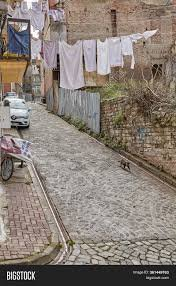

7d9b1b8a7b.jpg


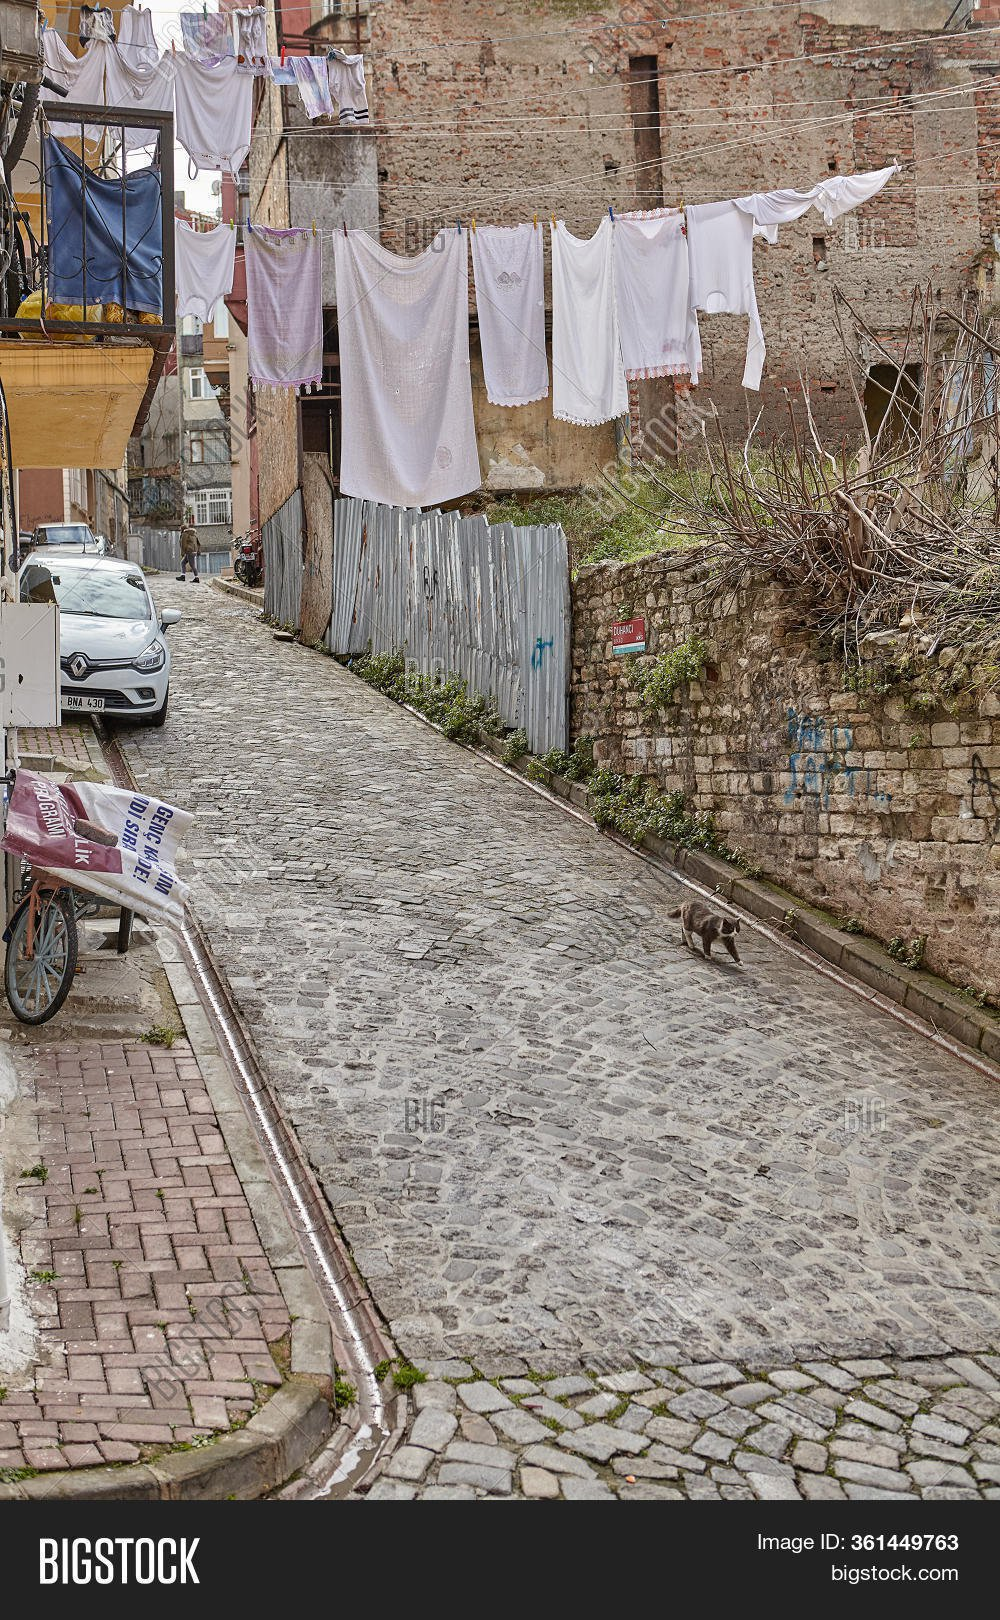

4584537802.jpg


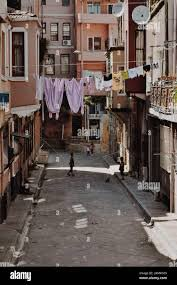

In [21]:
showNearestNeighbours(8, indices, images, './clothes_hanging_on_istanbul_streets')

In [22]:
distances

array([[0.00000000e+00, 1.31410179e+01, 2.48982334e+01],
       [0.00000000e+00, 1.28541594e+01, 2.38458099e+01],
       [0.00000000e+00, 2.00030651e+01, 2.04842300e+01],
       [0.00000000e+00, 1.42600756e+01, 2.06926785e+01],
       [1.16800777e-06, 2.33050690e+01, 2.36635418e+01],
       [0.00000000e+00, 2.03076782e+01, 2.47137032e+01],
       [0.00000000e+00, 2.47577038e+01, 2.55654602e+01],
       [6.74349565e-07, 1.25082588e+01, 2.38847809e+01],
       [0.00000000e+00, 1.60066662e+01, 2.34649429e+01],
       [8.25906170e-07, 1.97113934e+01, 1.97460403e+01],
       [1.06624032e-06, 2.30252647e+01, 2.39742508e+01],
       [0.00000000e+00, 1.31410179e+01, 2.50900421e+01],
       [8.25906170e-07, 1.09879055e+01, 2.67160530e+01],
       [6.74349565e-07, 1.27160721e+01, 1.98730907e+01],
       [0.00000000e+00, 1.29973192e+01, 2.56363163e+01],
       [4.76837158e-07, 1.16340752e+01, 2.14412861e+01],
       [0.00000000e+00, 2.51033974e+01, 2.54210205e+01],
       [0.00000000e+00, 2.54471

In [23]:
G = nx.Graph()

In [24]:
for i in images:
    G.add_node(i)

In [25]:
def createEdges(indices, files, distances):
    weightedEdges = []
    for i in range(len(indices)):
        index = indices[i]
        dist = distances[i][1:]
        
        node = files[index[0]]
        
        edges = []
        print(dist)
        for e in index[1:]:
            edges.append(files[e])
        
        for i in range(len(edges)):
            weightedEdges.append((node, edges[i], dist[i]))
    
    return weightedEdges

In [26]:
edges = createEdges(indices, images, distances)

[13.141018 24.898233]
[12.854159 23.84581 ]
[20.003065 20.48423 ]
[14.260076 20.692678]
[23.305069 23.663542]
[20.307678 24.713703]
[24.757704 25.56546 ]
[12.508259 23.88478 ]
[16.006666 23.464943]
[19.711393 19.74604 ]
[23.025265 23.97425 ]
[13.141018 25.090042]
[10.9879055 26.716053 ]
[12.716072 19.87309 ]
[12.997319 25.636316]
[11.634075 21.441286]
[25.103397 25.42102 ]
[25.44714  25.673977]
[25.443386 25.498753]
[17.984413 19.852898]
[22.536219 22.703661]
[24.438217 27.545748]
[24.792751 24.985048]
[14.445785 27.45404 ]
[19.879818 20.047255]
[19.082294 19.743881]
[16.005524 27.303247]
[12.88072  20.523254]
[12.508259 23.718685]
[ 8.843325 21.104809]
[12.716072 20.062168]
[11.106227 23.393063]
[17.902855 23.443031]
[15.1227255 26.404442 ]
[19.312956 20.2581  ]
[21.396315 21.46102 ]
[12.843202 25.50804 ]
[12.997319 25.230951]
[24.438217 25.159739]
[14.853604 22.091747]
[21.507578 22.04675 ]
[12.791929 25.645164]
[13.962668 22.427526]
[23.265583 23.65173 ]
[21.559969 22.278389]
[13.80

In [27]:
edges

[('06fc889842.jpg', '1e9ef7c392.jpg', 13.141018),
 ('06fc889842.jpg', '67fa55bf67.jpg', 24.898233),
 ('0a55789b8c.jpg', '73b436a8ef.jpg', 12.854159),
 ('0a55789b8c.jpg', '39dec295e8.jpg', 23.84581),
 ('0bb033c5c6.jpg', 'e4fafb0b2e.jpg', 20.003065),
 ('0bb033c5c6.jpg', '85c6edcea4.jpg', 20.48423),
 ('1105be2782.jpg', 'a9a3e31f5e.jpg', 14.260076),
 ('1105be2782.jpg', '70ee640d1e.jpg', 20.692678),
 ('1134ec7ea8.jpg', '34b7d8d16e.jpg', 23.305069),
 ('1134ec7ea8.jpg', 'e22626b5e5.jpg', 23.663542),
 ('129a35432c.jpg', 'dfd1efe054.jpg', 20.307678),
 ('129a35432c.jpg', 'deeaef79f9.jpg', 24.713703),
 ('13107d77f3.jpg', 'fdf50ffa63.jpg', 24.757704),
 ('13107d77f3.jpg', 'd6749261c9.jpg', 25.56546),
 ('14eaf82fe4.jpg', '39dec295e8.jpg', 12.508259),
 ('14eaf82fe4.jpg', 'fe1888ff11.jpg', 23.88478),
 ('165ca5f384.jpg', '7d9b1b8a7b.jpg', 16.006666),
 ('165ca5f384.jpg', '4584537802.jpg', 23.464943),
 ('191ba9eb91.jpg', '85c6edcea4.jpg', 19.711393),
 ('191ba9eb91.jpg', '673c00ef39.jpg', 19.74604),
 ('19

In [28]:
G.add_weighted_edges_from(edges)

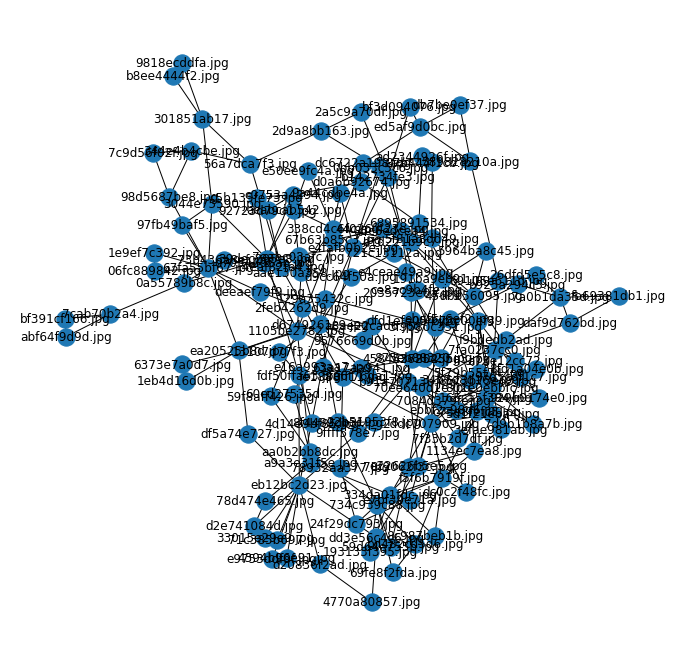

In [29]:
fig, ax = plt.subplots(figsize = (12,12))
nx.draw(G, with_labels=True)

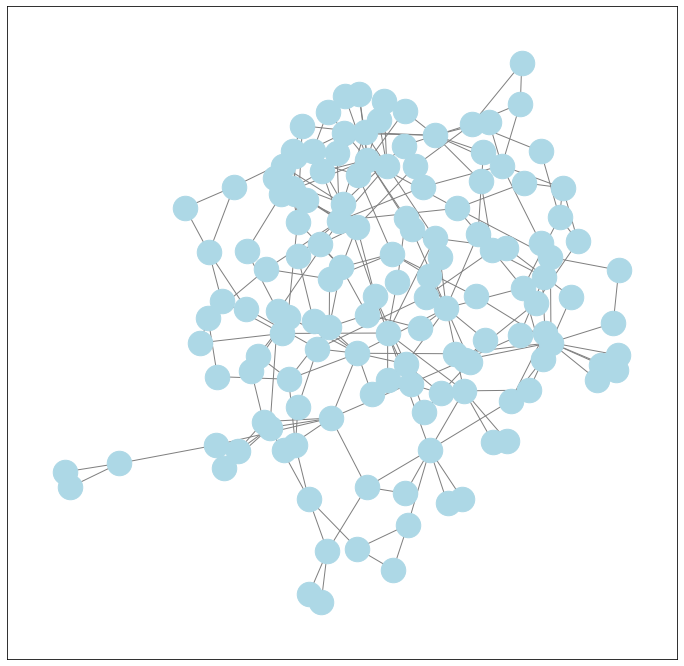

In [30]:
fig, ax = plt.subplots(figsize = (12,12)) 
pos = nx.spring_layout(G) # Define a layout for the graph 
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_shape='o', node_size=600) 
nx.draw_networkx_edges(G, pos, edge_color='gray') 

In [40]:
T = nx.minimum_spanning_tree(G)

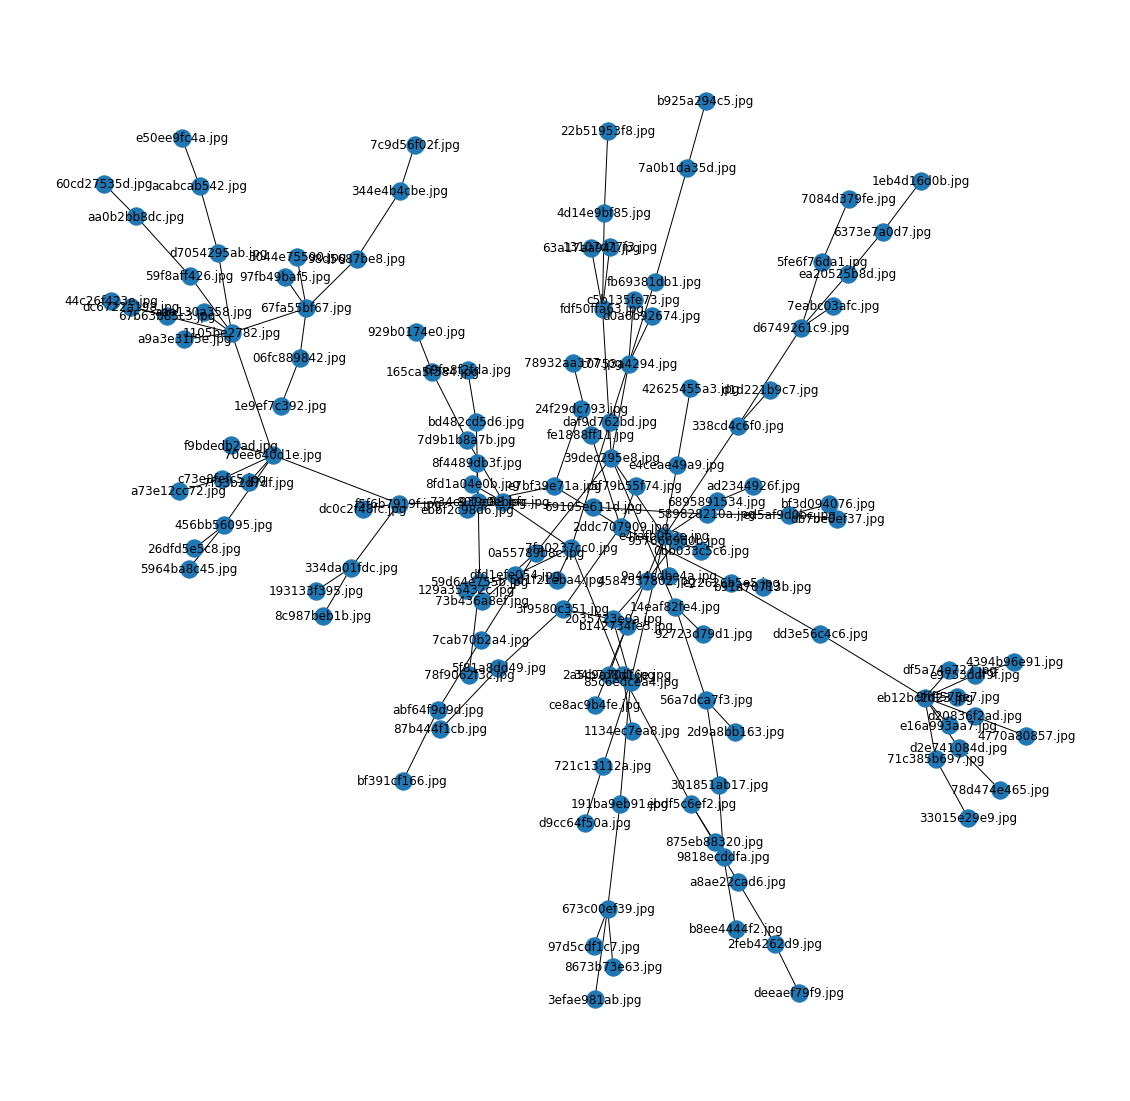

In [42]:
fig, ax = plt.subplots(figsize = (20,20))
nx.draw(T,with_labels=True)